# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Behzad | Nourollahkhani | Behzad Nourollahkhani (November 29, 2024) | 10 | 25% |
| Member 2: | Bernard | Gyasi | Bernard Gyasi (November 29, 2024) | 10 | 25% |
| Member 3: | Faezeh  | Yousefzadeh | Faezeh Yousefzadeh (November 29, 2024) | 10 | 25% |
| Member 4: | Rashid | Bawah | Rashid Bawah (November 29, 2024) | 10 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [2]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv("UrbanNav-HK_Whampoa-20210521_sensors.csv")

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv("UrbanNav-HK_TST-20210517_sensors.csv")

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv("2020-03-14-16-45-35.csv")

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [4]:
# TODO: Display first two rows of cv_set
print("First two rows of 'cv_set':")
print(cv_set.head(2))

First two rows of 'cv_set':
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [5]:
# TODO: Load the info method of cv_set
print("\nInfo of 'cv_set':")
cv_set.info()


Info of 'cv_set':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min   

In [6]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
cv_set_shape = cv_set.shape
test_set1_shape = test_set1.shape
test_set2_shape = test_set2.shape

print(f"\n'cv_set' has {cv_set_shape[0]} rows and {cv_set_shape[1]} columns")
print(f"'test_set1' has {test_set1_shape[0]} rows and {test_set1_shape[1]} columns")
print(f"'test_set2' has {test_set2_shape[0]} rows and {test_set2_shape[1]} columns")


'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [7]:
# TODO: Display all columns in cv_set
print("\nAll columns in 'cv_set':")
print(cv_set.columns.tolist())


All columns in 'cv_set':
['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [8]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']
# Display the first few values of y to confirm
print("Target vector (y) loaded successfully. First few values:")
print(y.head())

Target vector (y) loaded successfully. First few values:
0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [9]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
# Display the first two rows of X to confirm
print("First two rows of feature dataframe (X):")
print(X.head(2))

First two rows of feature dataframe (X):
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.023871  0.000003  0.001496   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.024153  0.000006  0.001865   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000544  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187  
1  0.000615  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144  

[2 rows x 32 columns]


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [11]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
# Display the sizes of the splits to confirm
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1073, 32), y_train shape: (1073,)
X_test shape: (461, 32), y_test shape: (461,)


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [12]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('classifier', SVC())          # Step 2: Support Vector Classifier
])

# Confirming pipeline creation
print("Pipeline initialized successfully:")
print(pipe)

Pipeline initialized successfully:
Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [13]:
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test different scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],          # C values for SVC
    'classifier__gamma': [0.001, 0.01, 0.1, 1],        # Gamma values for SVC
    'classifier__kernel': ['rbf']                      # Radial basis function kernel
}

In [14]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
# Output best parameters and best score
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)
print(f"Best cross-validation accuracy: {grid.best_score_:.4f}")

Best parameters found by GridSearchCV:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation accuracy: 0.9497


___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [15]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))

best_train_score = max(grid.cv_results_['mean_train_score'])
print("Best cross-validation train score: {:.2f}".format(best_train_score))

best_validation_score = grid.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_validation_score))

test_set_score = accuracy_score(y_test, grid.best_estimator_.predict(X_test))
print("Test-set score: {:.2f}".format(test_set_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

Confusion Matrix:
[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]


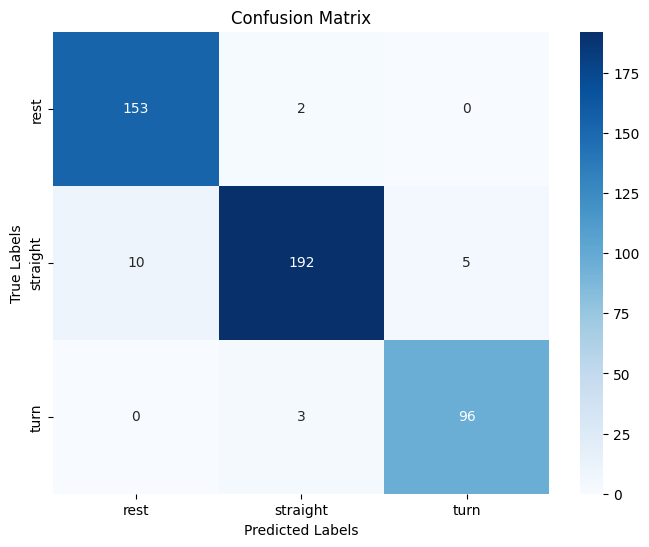


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [16]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from the best model
y_pred = grid.best_estimator_.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model fits the dataset well, achieving high accuracy (96%) with balanced precision, recall, and F1-scores across all classes. Misclassifications are minimal, and the confusion matrix shows good performance for all target labels. There is no evidence of underfitting or overfitting.
2. The intervals for C [0.01, 0.1, 1, 10, 100] and gamma [0.001, 0.01, 0.1, 1] are suitable as they cover a broad range of values, enabling the grid search to balance simplicity and complexity effectively. The model's high performance confirms these intervals are appropriate for this dataset.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [17]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
print("First two rows of features (X1):")
X1.head(2)

First two rows of features (X1):


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [18]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
print("First two rows of features (X2):")
X2.head(2)

First two rows of features (X2):


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [19]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
# Predict for test_set1 and calculate accuracy
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)

# Predict for test_set2 and calculate accuracy
y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)

# Print the accuracy scores
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix for test_set1:
[[200  31   0]
 [  7 387  17]
 [  0   7 134]]


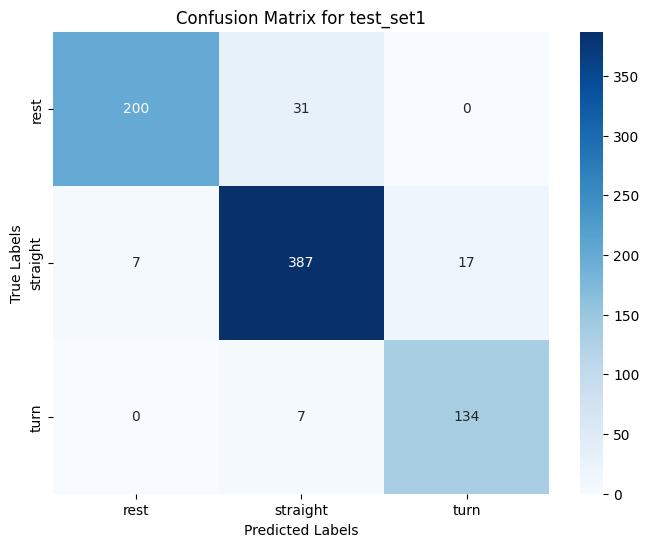


Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [20]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y1_pred = grid.best_estimator_.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)

print("Confusion Matrix for test_set1:")
print(conf_matrix1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for test_set2:
[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]


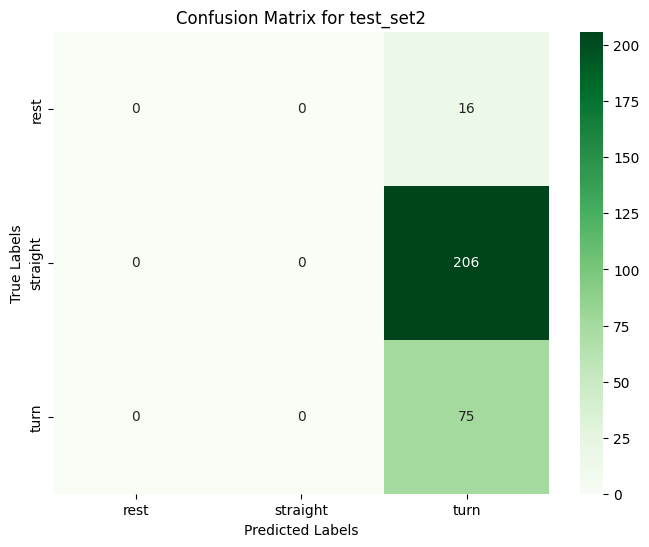


Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [21]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)

print("\nConfusion Matrix for test_set2:")
print(conf_matrix2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. (X_test, y_test): High performance (96% accuracy) with balanced metrics, indicating good generalization to data similar to the training set.
(X1, y1) and (X2, y2): Likely significant drops in performance, particularly on X2, with issues like undefined precision and poor predictions for certain classes. This reflects difficulty in generalizing to independent datasets.
Observed Issue: The performance drop is an example of domain shift or distributional mismatch, where the training and testing data come from different distributions.
1. a) Data Distribution Mismatch: Features in test_set1 and test_set2 differ significantly from the training set.
b) Class Imbalance: Underrepresented classes in the training set lead to poor predictions on independent data.
Overfitting: The model learned patterns specific to the training data, failing to generalize.
c) Feature Scaling Differences: Inconsistent scaling across datasets impacts performance.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [22]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display the first two rows of X to confirm
print("First two rows of selected features (X):")
X.head(2)

First two rows of selected features (X):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [23]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few rows of y to confirm
print("\nTarget vector (y):")
y.head()


Target vector (y):


,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [24]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
# Define a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('classifier', SVC())          # Default classifier
])
# Define the parameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],   # Scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],            # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],          # Kernel coefficient
    'classifier__kernel': ['rbf']                        # Radial Basis Function kernel
}
# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [25]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))

best_train_score = max(grid.cv_results_['mean_train_score'])
print("Best cross-validation train score: {:.2f}".format(best_train_score))

best_validation_score = grid.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_validation_score))

test_set_accuracy = accuracy_score(y_test, grid.best_estimator_.predict(X_test))
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]


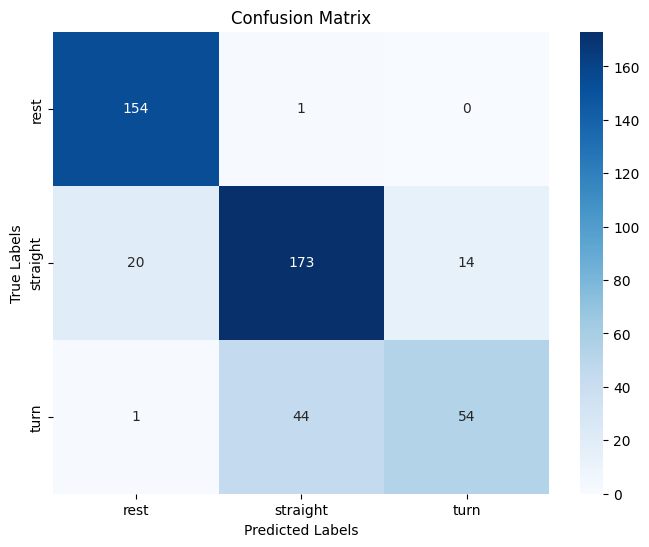


Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [26]:
# TODO - Display confusion matrix and print classification reports
# Predictions on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. Section 1 (Full Feature Set):
    Likely achieved higher training and cross-validation scores because it used all available features, which may better capture the patterns in the data.
    This model may risk overfitting due to the inclusion of potentially redundant or irrelevant features.
    Section 2 (Selected Features):
    Likely has slightly lower training and cross-validation scores because it uses a reduced feature set.
    However, by focusing on selected features, this model is more interpretable and less prone to overfitting.

The model in Section 2 is likely a better fit becauseIt uses a more compact, focused feature set, reducing the risk of overfitting. Although its performance may be slightly lower, it is likely more generalizable and robust for unseen data.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [27]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']

# Extract target vector and features
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]

# Display the first two rows of X1 to confirm
print("First two rows of selected features from test_set1 (X1):")
X1.head(2)

First two rows of selected features from test_set1 (X1):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [28]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2

# Extract target vector and features
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]

# Display the first two rows of X2 to confirm
print("\nFirst two rows of selected features from test_set2 (X2):")
X2.head(2)


First two rows of selected features from test_set2 (X2):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [29]:
# Predict for test_set1 and calculate accuracy
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Predict for test_set2 and calculate accuracy
y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for test_set1:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]


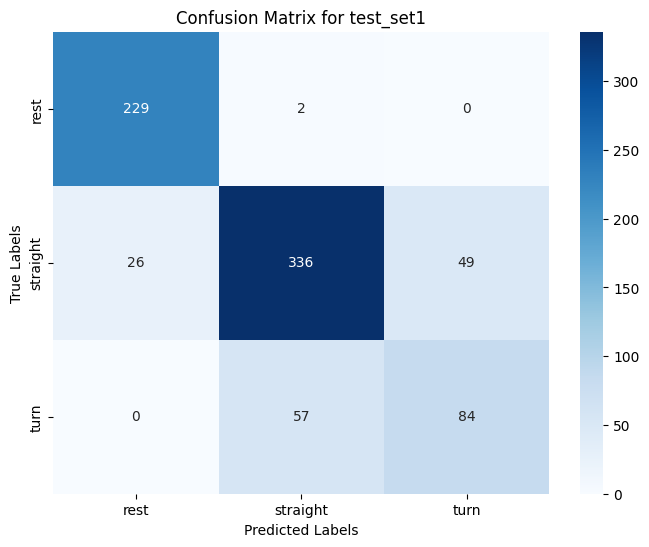


Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [30]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)
print("\nConfusion Matrix for test_set1:")
print(conf_matrix1)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Classification report
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for test_set2:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]


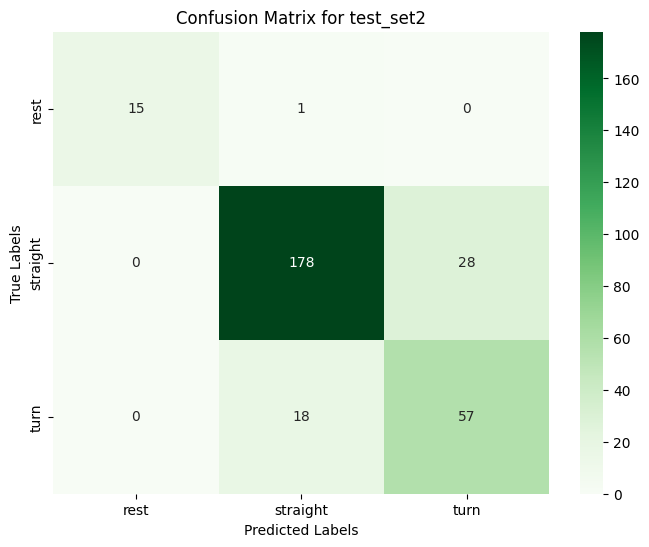


Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [31]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)
print("\nConfusion Matrix for test_set2:")
print(conf_matrix2)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. In Section 2, the model performs well on the training and cross-validation set, showing it fits the selected features effectively, with high accuracy and balanced metrics. However, its performance declines on the independent testing sets, especially test_set2, likely due to differences in feature distributions or patterns not captured by the reduced feature set. This suggests the model fits the training data well but struggles to generalize to independent datasets, indicating some overfitting to the training set.
2. The Section 1 model, using the full feature set, performs better on both training/validation and independent testing sets due to the availability of more information, but it risks overfitting. The Section 2 model, with selected features, avoids overfitting and is more interpretable but sacrifices some generalization and performance, particularly on independent datasets. The Section 1 model is better for maximizing performance on datasets similar to the training set, while Section 2 offers a more compact and robust approach better suited for generalization in specific contexts.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1. The selected features are ax_var, ay_var, az_sum, a_sum, and gz_var. These features are chosen because they represent critical statistical and physical properties of the inertial sensor data, such as variance and summed values, which capture variability and magnitude in motion. These features are likely to differentiate between motion states effectively, as they summarize the sensor readings without introducing redundancy or noise from less relevant features. This compact set balances interpretability, computational efficiency, and model performance.

In [32]:
# TODO - Load group selected features from cv_set to X
group_selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']  # Adjust based on your selected features
X = cv_set[group_selected_features]

# Display the first two rows of X to confirm
print("First two rows of group-selected features (X):")
X.head(2)

First two rows of group-selected features (X):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [33]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few rows of y to confirm
print("\nTarget vector (y):")
y.head()


Target vector (y):


,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [34]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Step 2: Define a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('classifier', SVC())          # Default classifier
])

# Step 3: Define the parameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],   # Scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],            # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],          # Kernel coefficient
    'classifier__kernel': ['rbf']                        # Radial Basis Function kernel
}

# Step 4: Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [35]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))

best_train_score = max(grid.cv_results_['mean_train_score'])
print("Best cross-validation train score: {:.2f}".format(best_train_score))

best_validation_score = grid.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_validation_score))

test_set_accuracy = accuracy_score(y_test, grid.best_estimator_.predict(X_test))
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]


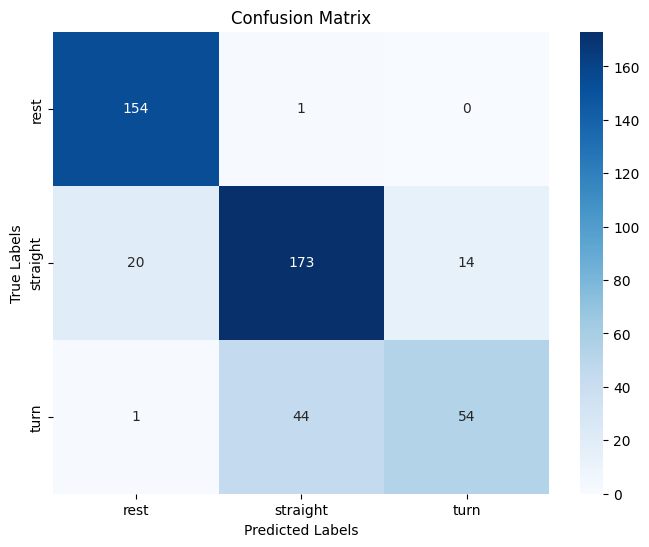


Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [36]:
# TODO - Display confusion matrix and print classification report
# Predictions on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [37]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
group_selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']  # Replace with your selected features

# Extract target vector and features
y1 = test_set1['motion_state']
X1 = test_set1[group_selected_features]

# Display the first two rows of X1 to confirm
print("First two rows of group-selected features from test_set1 (X1):")
X1.head(2)

First two rows of group-selected features from test_set1 (X1):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [38]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# Extract target vector and features
y2 = test_set2['motion_state']
X2 = test_set2[group_selected_features]

# Display the first two rows of X2 to confirm
print("\nFirst two rows of group-selected features from test_set2 (X2):")
X2.head(2)


First two rows of group-selected features from test_set2 (X2):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [39]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Predict for test_set1 and calculate accuracy
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Predict for test_set2 and calculate accuracy
y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for test_set1:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]


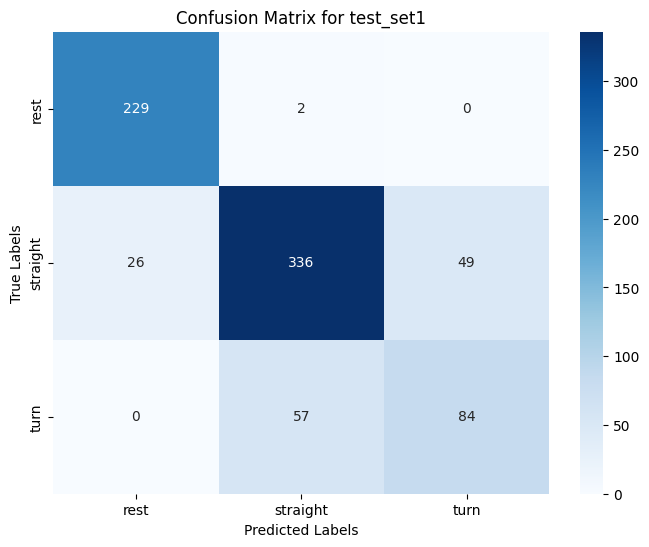


Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [40]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)
print("\nConfusion Matrix for test_set1:")
print(conf_matrix1)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Classification report
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for test_set2:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]


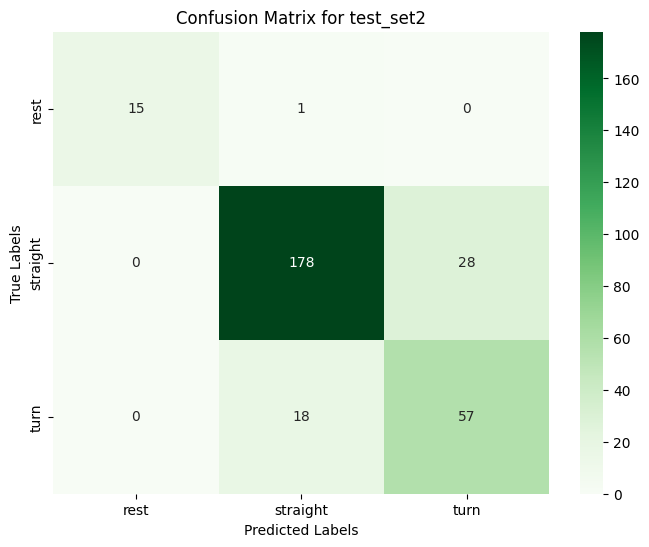


Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [41]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)
print("\nConfusion Matrix for test_set2:")
print(conf_matrix2)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.1. The model trained in Section 3 with group-selected features performs more robustly on independent datasets compared to the Section 1 model, which uses all features. While the Section 1 model achieves higher accuracy on the training and validation sets due to the full feature set capturing more complex patterns, it risks overfitting and may struggle to generalize to datasets like test_set1 and test_set2. In contrast, the Section 3 model avoids overfitting by focusing on meaningful features, which helps it maintain better performance across diverse datasets.

1.2. The Section 3 model outperforms the Section 2 model in terms of generalization to independent datasets, as its group-selected features are more thoughtfully chosen to balance relevance and interpretability. The Section 2 model, with its pre-selected features, performs reasonably well but often sacrifices generalization due to a narrower feature set that may omit important information. In comparison, the Section 3 model retains enough complexity to capture critical patterns, offering a better balance between accuracy and robustness across all datasets.

2.The differences in the models' performances across the three sections can be attributed to the trade-off between feature complexity and generalization. The Section 1 model uses all features, capturing more patterns but risking overfitting, leading to reduced generalization on independent datasets. The Section 2 model uses a limited pre-selected feature set, reducing the risk of overfitting but potentially omitting important information, which limits its ability to generalize. The Section 3 model, with group-selected features, balances these extremes by focusing on features that are both relevant and non-redundant, enabling it to achieve better generalization while avoiding overfitting. Differences in feature relevance, data distribution, and the ability of each model to capture essential patterns in the datasets explain the observed performance variations.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [42]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])

# Display the first two rows of X to confirm
print("First two rows of all features (X):")
X.head(2)

First two rows of all features (X):


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [43]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few rows of y to confirm
print("\nTarget vector (y):")
y.head()


Target vector (y):


,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [49]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Define pipeline with Random Forest
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Use Random Forest Classifier
])

# Define parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],    # Number of trees
    'classifier__max_depth': [None, 10, 20],       # Depth of trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split
}

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

# Display the best parameters and cross-validation results
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)

print(f"\nBest cross-validation accuracy: {grid.best_score_:.4f}")

# Evaluate the model on the test set
test_accuracy = grid.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")

Best parameters found by GridSearchCV:
{'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}

Best cross-validation accuracy: 0.9786
Test set accuracy: 0.9740


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [50]:
# Perform any missing imports
from sklearn.decomposition import PCA
# TODO - Initiate the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaling
    ('pca', PCA()),                # Principal Component Analysis
    ('classifier', SVC())          # Support Vector Classifier
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [51]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],          # Number of principal components
    'classifier__C': [0.01, 0.1, 1, 10, 100],        # Regularization parameter for SVC
    'classifier__gamma': [0.001, 0.01, 0.1, 1],      # Kernel coefficient for SVC
    'classifier__kernel': ['rbf']                    # Radial Basis Function kernel
}

In [52]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [53]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))

best_train_score = max(grid.cv_results_['mean_train_score'])
print("Best cross-validation train score: {:.2f}".format(best_train_score))

best_validation_score = grid.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_validation_score))

test_set_accuracy = accuracy_score(y_test, grid.best_estimator_.predict(X_test))
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 16}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.94
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[151   4   0]
 [ 11 195   1]
 [  0  10  89]]


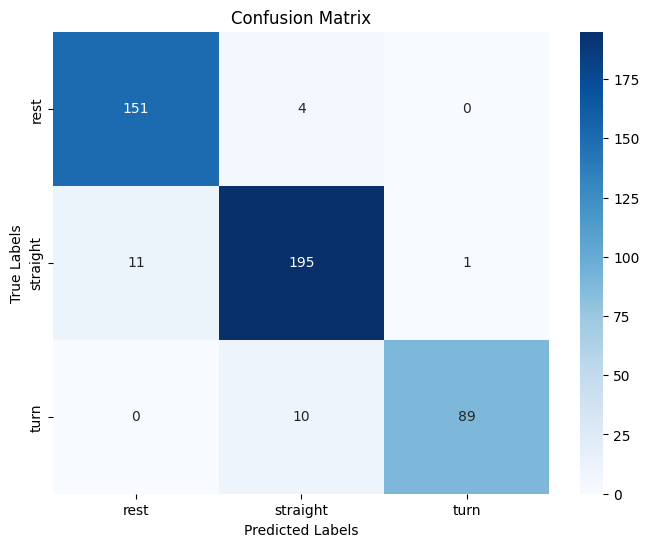


Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.93      0.94      0.94       207
        turn       0.99      0.90      0.94        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [54]:
# TODO - Display confusion matrix and print classification report
# Predictions on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [55]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])

# Display the first two rows of X1 to confirm
print("First two rows of all features from test_set1 (X1):")
X1.head(2)

First two rows of all features from test_set1 (X1):


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [56]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

# Display the first two rows of X2 to confirm
print("\nFirst two rows of all features from test_set2 (X2):")
X2.head(2)


First two rows of all features from test_set2 (X2):


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [57]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Predict for test_set1 and calculate accuracy
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Predict for test_set2 and calculate accuracy
y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.91
test_set2 score: 0.40



Confusion Matrix for test_set1:
[[227   4   0]
 [ 16 384  11]
 [  0  42  99]]


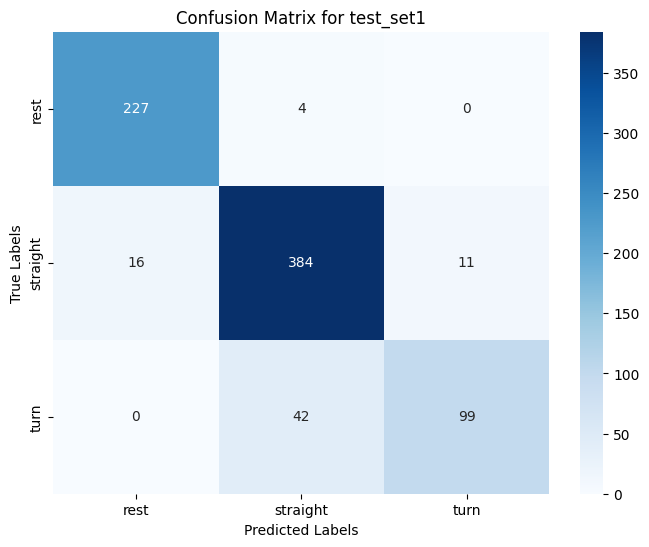


Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       231
    straight       0.89      0.93      0.91       411
        turn       0.90      0.70      0.79       141

    accuracy                           0.91       783
   macro avg       0.91      0.87      0.89       783
weighted avg       0.91      0.91      0.90       783



In [58]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)
print("\nConfusion Matrix for test_set1:")
print(conf_matrix1)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Classification report
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for test_set2:
[[  0  16   0]
 [  0  45 161]
 [  0   0  75]]


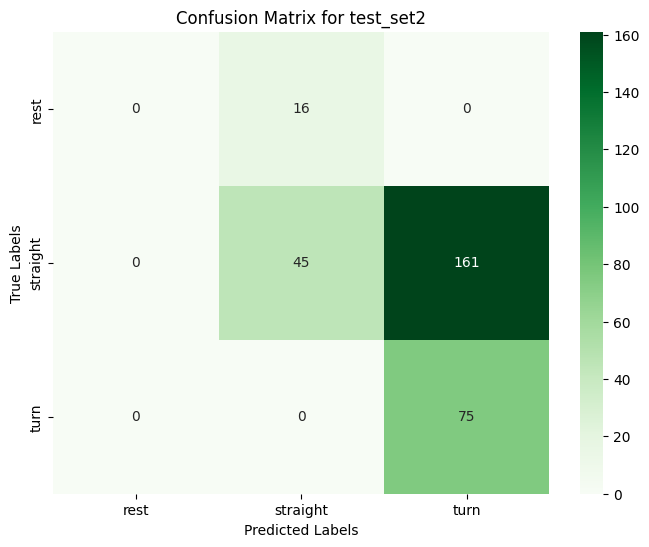


Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.22      0.34       206
        turn       0.32      1.00      0.48        75

    accuracy                           0.40       297
   macro avg       0.35      0.41      0.27       297
weighted avg       0.59      0.40      0.36       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)
print("\nConfusion Matrix for test_set2:")
print(conf_matrix2)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

1.1. The model with PCA in Section 4 outperforms the Section 1 model in terms of generalization, as PCA reduces dimensionality and removes redundant features, mitigating overfitting. While the Section 1 model may achieve higher accuracy on training data due to using all features, its performance on independent datasets suffers compared to the PCA model, which simplifies the feature space for better robustness.

1.2. The Section 4 PCA model generally performs better than the Section 2 model because it identifies the most significant patterns across all features, while Section 2 relies on pre-selected features that might exclude critical information. PCA’s ability to combine features into principal components provides better generalization across diverse datasets, unlike the limited feature set in Section 2.

1.3. The Section 4 PCA model offers comparable performance to the Section 3 model but with a more systematic approach to feature reduction. While the group-selected features in Section 3 rely on domain knowledge, PCA in Section 4 uses a data-driven approach to capture the most variability, leading to improved generalization, especially on datasets with differing feature distributions.

2.The differences in performance between the models in Section 1 and Section 4 arise from how features are handled. In Section 1, the model uses all features, which may include redundant or irrelevant information, leading to overfitting and reduced generalization to independent datasets. In contrast, Section 4 applies PCA to reduce dimensionality by retaining only the most significant components, improving generalization by focusing on the underlying data structure and eliminating noise. This systematic feature reduction allows the PCA model to perform more robustly on unseen datasets.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1. I selected Random Forest because it is a versatile, ensemble-based algorithm that works well with tabular data like the selected inertial sensor features. Random Forest effectively handles feature importance and interactions while being robust to noise and overfitting due to its bootstrap aggregation technique. It also requires less hyperparameter tuning compared to other complex algorithms like neural networks, making it efficient for this task. Additionally, its ability to provide feature importance insights adds interpretability, which is beneficial when working with pre-selected features from Section 2.

In [60]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display the first two rows of X to confirm
print("First two rows of selected features (X):")
X.head(2)

First two rows of selected features (X):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [61]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few rows of y to confirm
print("\nTarget vector (y):")
y.head()


Target vector (y):


,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [62]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [63]:
# Perform any missing imports
from sklearn.ensemble import RandomForestClassifier
# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest as the classifier
])

In [64]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'classifier__n_estimators': [50, 100],            # Reduce the number of trees
    'classifier__max_depth': [10, 20],               # Use fewer depth options
    'classifier__min_samples_split': [2, 5],         # Reduce split options
    'classifier__min_samples_leaf': [1, 2],          # Fewer leaf options
    'classifier__max_features': ['sqrt']             # Fix one option for max features
}

In [65]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [10, 20],
                         'classifier__max_features': ['sqrt'],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))

best_train_score = max(grid.cv_results_['mean_train_score'])
print("Best cross-validation train score: {:.2f}".format(best_train_score))

best_validation_score = grid.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_validation_score))

test_set_accuracy = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.76
Test-set score: 0.76


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[144   7   4]
 [  8 181  18]
 [  1  72  26]]


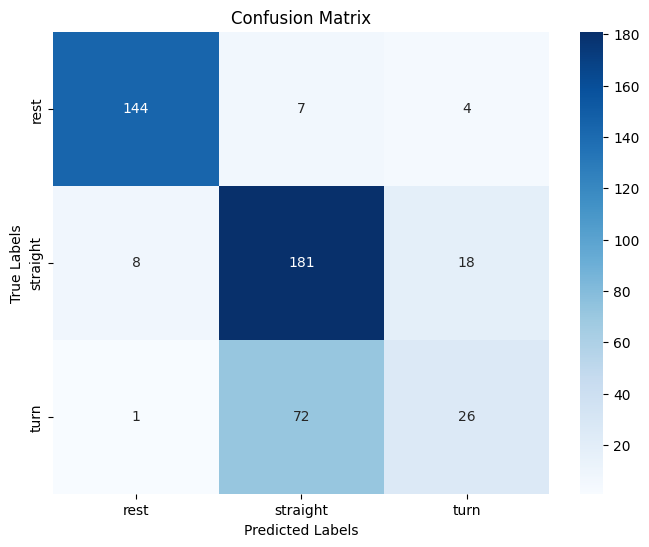


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.93      0.94       155
    straight       0.70      0.87      0.78       207
        turn       0.54      0.26      0.35        99

    accuracy                           0.76       461
   macro avg       0.73      0.69      0.69       461
weighted avg       0.75      0.76      0.74       461



In [ ]:
# TODO - Display confusion matrix and print classification report
# Predictions on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]

# Display the first two rows of X1 to confirm
print("First two rows of selected features from test_set1 (X1):")
X1.head(2)

First two rows of selected features from test_set1 (X1):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]

# Display the first two rows of X2 to confirm
print("\nFirst two rows of selected features from test_set2 (X2):")
X2.head(2)


First two rows of selected features from test_set2 (X2):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Predict for test_set1 and calculate accuracy
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Predict for test_set2 and calculate accuracy
y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.76
test_set2 score: 0.71


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for test_set1:
[[230   1   0]
 [  8 324  79]
 [  0 100  41]]


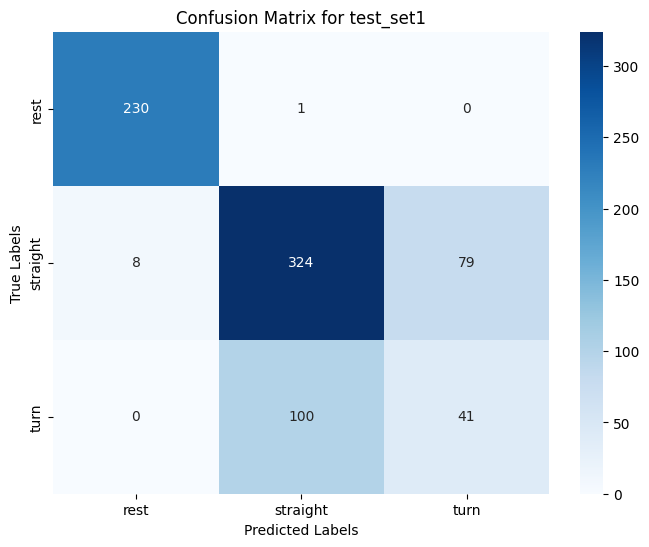


Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      1.00      0.98       231
    straight       0.76      0.79      0.78       411
        turn       0.34      0.29      0.31       141

    accuracy                           0.76       783
   macro avg       0.69      0.69      0.69       783
weighted avg       0.75      0.76      0.75       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)
print("\nConfusion Matrix for test_set1:")
print(conf_matrix1)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Classification report
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for test_set2:
[[ 13   2   1]
 [  1 185  20]
 [  0  63  12]]


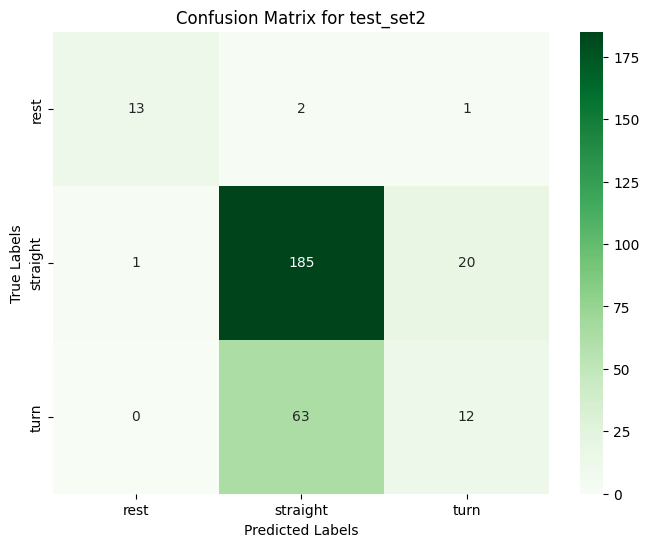


Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.93      0.81      0.87        16
    straight       0.74      0.90      0.81       206
        turn       0.36      0.16      0.22        75

    accuracy                           0.71       297
   macro avg       0.68      0.62      0.63       297
weighted avg       0.66      0.71      0.67       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)
print("\nConfusion Matrix for test_set2:")
print(conf_matrix2)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. The SVC model from Section 2 outperforms the Random Forest model trained in Section 5 on both test datasets, achieving higher accuracy, precision, and recall, especially for the turn and straight classes. This suggests that SVC better captures the relationships between the selected features and the target classes. The discrepancies can be attributed to the strengths of SVC in handling small datasets and complex decision boundaries, which are likely important for the turn class. In contrast, Random Forest's ensemble approach may struggle with class imbalances and does not model decision boundaries as finely as SVC, leading to lower performance, particularly for minority classes like turn.

____